In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
import itertools
import scipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [128]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.21.2.


In [129]:
%matplotlib inline
data_url="/Users/monalisa/Downloads/OJ.csv"
data=pd.read_csv(data_url)

In [64]:
# target(PURCHASE) distribution
l = data["Purchase"].value_counts()

In [65]:
purchase_pct = l[1]/len(data) *100
print (f"precentage of purchase in the dataset is {purchase_pct:.2f}")

precentage of purchase in the dataset is 38.97


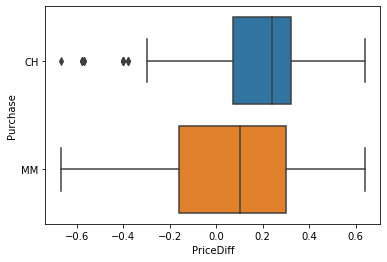

In [66]:
import seaborn as sns
ax= sns.boxplot(x="PriceDiff", y="Purchase", data=data)

In [130]:
# dropping passed values 
data.drop(["Unnamed: 0","Store7", "STORE"], axis = 1, inplace = True)

In [131]:
#X=data.iloc[:, 1:16].values
#y=data.iloc[:, 0].values
X=data.iloc[:, 1:16]
y=data.iloc[:, 0]

In [132]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le_y=LabelEncoder()
y=le_y.fit_transform(y)

In [133]:
X=pd.get_dummies(X,columns=["StoreID"])

In [71]:
X.shape

(1070, 19)

In [72]:
#Corrolation of numeric features
data['Purchase'] =data['Purchase'].astype('category').cat.codes
corr_matrix = data.corr()
corr_matrix["Purchase"].sort_values(ascending=False)

Purchase          1.000000
SpecialMM         0.174784
DiscMM            0.166921
PctDiscMM         0.166459
SalePriceCH       0.132126
PriceCH          -0.023021
WeekofPurchase   -0.125572
SpecialCH        -0.132751
PriceMM          -0.149180
ListPriceDiff    -0.164599
DiscCH           -0.181249
PctDiscCH        -0.182201
SalePriceMM      -0.220584
StoreID          -0.252625
PriceDiff        -0.275022
LoyalCH          -0.640582
Name: Purchase, dtype: float64

<Figure size 144x144 with 0 Axes>

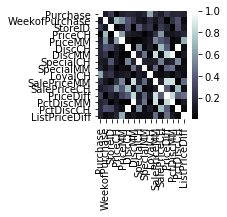

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (2,2))
sns.heatmap(abs(corr_matrix), 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
            cmap= "bone")
plt.show()

In [134]:
X.drop(["PctDiscMM","PctDiscCH"], axis = 1, inplace = True)

In [135]:
#Splitting of dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [137]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
logistic = LogisticRegression()
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)

In [147]:
print('Best Parameters',clf.best_params_)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print("-------"*10)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

Best Parameters {'C': 1.0, 'penalty': 'l1'}
Best Penalty: l1
Best C: 1.0
----------------------------------------------------------------------
0.832 (+/-0.045) for {'C': 1.0, 'penalty': 'l1'}
0.828 (+/-0.043) for {'C': 1.0, 'penalty': 'l2'}
0.831 (+/-0.049) for {'C': 2.7825594022071245, 'penalty': 'l1'}
0.828 (+/-0.043) for {'C': 2.7825594022071245, 'penalty': 'l2'}
0.829 (+/-0.046) for {'C': 7.742636826811269, 'penalty': 'l1'}
0.828 (+/-0.043) for {'C': 7.742636826811269, 'penalty': 'l2'}
0.829 (+/-0.046) for {'C': 21.544346900318832, 'penalty': 'l1'}
0.828 (+/-0.043) for {'C': 21.544346900318832, 'penalty': 'l2'}
0.829 (+/-0.046) for {'C': 59.94842503189409, 'penalty': 'l1'}
0.828 (+/-0.043) for {'C': 59.94842503189409, 'penalty': 'l2'}
0.829 (+/-0.046) for {'C': 166.81005372000593, 'penalty': 'l1'}
0.828 (+/-0.043) for {'C': 166.81005372000593, 'penalty': 'l2'}
0.828 (+/-0.043) for {'C': 464.15888336127773, 'penalty': 'l1'}
0.828 (+/-0.043) for {'C': 464.15888336127773, 'penalty': 

In [80]:
y_pred_Logisticregression=best_model.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_Logisticregression)

array([[116,  14],
       [ 25,  59]])

In [82]:
#best_model.predict(X_train)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_Logisticregression))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       130
           1       0.81      0.70      0.75        84

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.80       214
weighted avg       0.82      0.82      0.82       214



In [84]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_Logisticregression)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_Logisticregression)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_Logisticregression)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_Logisticregression)))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_pred_Logisticregression)))

Accuracy = 0.82
Kappa = 0.61
F1 Score = 0.75
Log Loss = 6.29
AUC = 0.80


In [146]:
 def GridSearch_func(X,y, estimator, param_grid, cv=10 , scoring = 'roc_auc'):

    grid_search = GridSearchCV(estimator, param_grid, cv=cv,
                           scoring=scoring)
    grid_search.fit(X, y)
    print ("best parameters: ", grid_search.best_params_)
    #print(f"best {scoring} score during training: ", grid_search.best_score_)
    print("-------"*10)
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
    print()
    print(f"mean of {scoring} scores during validation: {sum(means)/len(means):0.3f}")
    print("-------"*10)
    best_model = grid_search.best_estimator_
    print ("best_model: ", best_model)
    
    return best_model


In [123]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(splitter='best', presort=True, class_weight={0:0.75, 1:0.25}, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
param_grid_dt = [{'criterion':('gini', 'entropy'), 'max_depth':[2, 4, 6, 8, 10,12], 'min_samples_split':[2, 10, 50,100], 'min_samples_leaf':[1, 5, 10,50],
             'max_features':[None, 'auto'], 'max_leaf_nodes':[None, 5, 10, 50,100], 'min_impurity_decrease':[0, 0.1, 0.2]}]
dt_model = GridSearch_func(X = X_train, y= np.ravel(y_train),
                           estimator = dt_clf, param_grid = param_grid_dt, cv=10, scoring = 'roc_auc')

DecisionTreeClassifier(class_weight={0: 0.75, 1: 0.25}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=42, splitter='best')

best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 10, 'min_samples_split': 50}
----------------------------------------------------------------------
0.832 (+/-0.045) for {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.828 (+/-0.043) for {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.831 (+/-0.049) for {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 50}
0.828 (+/-0.043) for {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 100}
0.829 (+/-0.046) for {

/Users/monalisa/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_dt)

array([[101,  29],
       [ 30,  54]])

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       130
           1       0.65      0.64      0.65        84

    accuracy                           0.72       214
   macro avg       0.71      0.71      0.71       214
weighted avg       0.72      0.72      0.72       214



In [141]:
#print(dt_clf.tree_.node_count)
#print(dt_clf.tree_.impurity)
#print(dt_clf.tree_.children_left)
#print(dt_clf.tree_.threshold)


In [90]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_dt)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_dt)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_dt)))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_pred_dt)))

Accuracy = 0.72
Kappa = 0.42
F1 Score = 0.65
Log Loss = 9.52
AUC = 0.71


In [124]:
#Random Forest with Final features
from sklearn.ensemble import RandomForestClassifier 
rf_clf = RandomForestClassifier(n_jobs = -1, random_state=42 , class_weight= {0:0.75, 1:0.25}, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
#param_grid_rf = [{'n_estimators': [ 400, 500, 600 ]  , 'max_depth' : [ 10, 15, 20] }]
param_grid_rf = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],

    'criterion' :['gini', 'entropy']
}
#rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rf_model = GridSearch_func(X = X_train, y= np.ravel(y_train),
                           estimator = rf_clf, param_grid =param_grid_rf, cv=10  , scoring = "roc_auc")

RandomForestClassifier(bootstrap=True, class_weight={0: 0.75, 1: 0.25},
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
----------------------------------------------------------------------
0.832 (+/-0.045) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
0.828 (+/-0.043) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.831 (+/-0.049) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.828 (+/-0.043) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.829 (+/-0.046) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.828 (+/-0.043) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.829 (+/-0.046) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.828 (+/-0.043) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators'

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[120,  10],
       [ 35,  49]])

In [93]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_rf)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_rf)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_rf)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_rf)))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_pred_rf)))

Accuracy = 0.79
Kappa = 0.53
F1 Score = 0.69
Log Loss = 7.26
AUC = 0.75


In [94]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
gnb
y_pred_gnb = gnb.predict(X_test)

GaussianNB(priors=None, var_smoothing=1e-09)

gnb.theta_ # Mean of each feature per class
gnb.sigma_ # Variance of each feature per class  

In [95]:
confusion_matrix(y_test, y_pred_gnb)

array([[96, 34],
       [23, 61]])

In [96]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       130
           1       0.64      0.73      0.68        84

    accuracy                           0.73       214
   macro avg       0.72      0.73      0.73       214
weighted avg       0.74      0.73      0.74       214



In [97]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_gnb)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_gnb)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_gnb)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_gnb)))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_pred_gnb)))

Accuracy = 0.73
Kappa = 0.45
F1 Score = 0.68
Log Loss = 9.20
AUC = 0.73


In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=100)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
#[20, 27 , 30 , 35]
param_grid_knn =  [{'n_neighbors': [20, 25 , 67 , 85],
               'weights': ['distance'],
                'metric': ['manhattan'],
               'p': [1]
                }]
knn_model = GridSearch_func(X = X_train, y= np.ravel(y_train),
                           estimator = knn_clf, param_grid = param_grid_knn, cv=10  , scoring = 'roc_auc')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

best parameters:  {'metric': 'manhattan', 'n_neighbors': 85, 'p': 1, 'weights': 'distance'}
----------------------------------------------------------------------
0.832 (+/-0.045) for {'metric': 'manhattan', 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
0.828 (+/-0.043) for {'metric': 'manhattan', 'n_neighbors': 25, 'p': 1, 'weights': 'distance'}
0.831 (+/-0.049) for {'metric': 'manhattan', 'n_neighbors': 67, 'p': 1, 'weights': 'distance'}
0.828 (+/-0.043) for {'metric': 'manhattan', 'n_neighbors': 85, 'p': 1, 'weights': 'distance'}

mean of roc_auc scores during validation: 0.829
----------------------------------------------------------------------
best_model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=85, p=1,
                     weights='distance')


In [99]:
knn_clf.effective_metric_
knn_clf.effective_metric_params_

'euclidean'

{}

In [100]:
print(confusion_matrix(y_test, y_pred_knn))

[[112  18]
 [ 38  46]]


In [101]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       130
           1       0.72      0.55      0.62        84

    accuracy                           0.74       214
   macro avg       0.73      0.70      0.71       214
weighted avg       0.74      0.74      0.73       214



In [102]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_knn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_knn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_knn)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_knn)))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_pred_knn)))

Accuracy = 0.74
Kappa = 0.43
F1 Score = 0.62
Log Loss = 9.04
AUC = 0.70


In [103]:
from sklearn.svm import SVC
svm_clf = SVC( random_state=42 , gamma = 'auto', probability= True)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
#svm_clf = SVC( random_state=42 , gamma = 'auto', probability= True)
param_grid_svm = [{'kernel': ['rbf' ]  , 'C' : [ 0.5,1]}]
svm_model = GridSearch_func(X = X_train, y= np.ravel(y_train),
                           estimator = svm_clf, param_grid = param_grid_svm, cv=10  , scoring = 'roc_auc')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

best parameters:  {'C': 0.5, 'kernel': 'rbf'}
----------------------------------------------------------------------
0.893 (+/-0.068) for {'C': 0.5, 'kernel': 'rbf'}
0.889 (+/-0.066) for {'C': 1, 'kernel': 'rbf'}

mean of roc_auc scores during validation: 0.891
----------------------------------------------------------------------
best_model:  SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [104]:
svm_clf.n_support_

array([205, 195], dtype=int32)

In [142]:
#svm_clf.support_vectors_

In [143]:
#svm_clf.dual_coef_

In [107]:
svm_clf.intercept_

array([-0.05693943])

In [108]:
print(confusion_matrix(y_test, y_pred_svm))

[[115  15]
 [ 24  60]]


In [109]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       130
           1       0.80      0.71      0.75        84

    accuracy                           0.82       214
   macro avg       0.81      0.80      0.80       214
weighted avg       0.82      0.82      0.82       214



In [110]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_svm)))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_pred_svm)))

Accuracy = 0.82
Kappa = 0.61
F1 Score = 0.75
Log Loss = 6.29
AUC = 0.80


In [111]:
from warnings import simplefilter
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
# ignore all future warnings
simplefilter(action='ignore', category=ConvergenceWarning)

In [145]:
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier(max_iter=50)
nn_clf.fit(X_train, y_train)
y_pred_nn = nn_clf.predict(X_test)
#print(y_pred_nn)
#nn_clf = MLPClassifier(max_iter=5)
param_grid_nn =  {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}
nn_model = GridSearch_func(X = X_train, y= np.ravel(y_train),
                           estimator = nn_clf, param_grid = param_grid_nn, cv=10  , scoring = 'roc_auc')

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

best parameters:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
----------------------------------------------------------------------
0.832 (+/-0.045) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.828 (+/-0.043) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.831 (+/-0.049) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.828 (+/-0.043) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.829 (+/-0.046) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.828 (+/-0.043) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_siz

In [113]:
nn_clf.loss_

0.34251447888533854

In [114]:
nn_clf.n_layers_

3

In [115]:
w = nn_clf.coefs_ # The ith element in the list represents the weight matrix corresponding to layer i.

In [116]:
b = nn_clf.intercepts_ # The ith element in the list represents the bias vector corresponding to layer i + 1.

In [117]:
nn_clf.out_activation_

'logistic'

In [118]:
print(confusion_matrix(y_test, y_pred_nn))

[[114  16]
 [ 23  61]]


In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       130
           1       0.79      0.73      0.76        84

    accuracy                           0.82       214
   macro avg       0.81      0.80      0.81       214
weighted avg       0.82      0.82      0.82       214



In [120]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_nn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_nn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_nn)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_nn)))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_pred_nn)))

Accuracy = 0.82
Kappa = 0.61
F1 Score = 0.76
Log Loss = 6.29
AUC = 0.80
